In [1]:
!pip install pandas
!pip install scipy
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# part 1)dataset
#Load the dataset into a DataFrame
df = pd.read_csv('Car Dataset.csv', na_values = '?')



In [3]:
#Display, describe, and provide information about the dataset attributes
print(df.head())
print(f'Number of rows: {df.shape[0]}\n')
print(f'Number of columns: {df.shape[1]}\n\n')
print(f'Data types of attributes:\n {df.dtypes}\n')

   symboling  normalized-losses         make fuel-type aspiration  \
0          1                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          3                NaN  alfa-romero       gas        std   
3          0                NaN         audi       gas      turbo   
4          1              158.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two    hatchback          rwd           front        94.5  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two  convertible          rwd           front        88.6  ...   
3          two    hatchback          4wd           front        99.5  ...   
4         four        sedan          fwd           front       105.8  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          152         mpfi  2.68    3.47       

In [4]:
# part 2) data pre-processing
# 1) handling duplicates
#Check for duplicate rows
duplicates = df.duplicated(keep=False)
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_num = duplicates.sum()
print(duplicate_rows)


     symboling  normalized-losses    make fuel-type aspiration num-of-doors  \
66           3              150.0   mazda       gas        std          two   
67           3              150.0   mazda       gas        std          two   
106          3              194.0  nissan       gas        std          two   
107          3              194.0  nissan       gas      turbo          two   
108          3              194.0  nissan       gas        std          two   
109          3              194.0  nissan       gas      turbo          two   
117          0              161.0  peugot    diesel      turbo         four   
121          0              161.0  peugot    diesel      turbo         four   
206         -1               74.0   volvo       gas        std         four   
207         -1               74.0   volvo       gas        std         four   
209         -1               74.0   volvo       gas        std         four   
210         -1               74.0   volvo       gas 

In [5]:
# Remove dups
df.drop_duplicates(inplace=True)

In [6]:
# check duplicated value after remove
duplicates = df.duplicated(keep=False)
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_num = duplicates.sum()
print(f'number of duplicated value after remove: {duplicates_num}')

number of duplicated value after remove: 0


visualization method to detect outliers


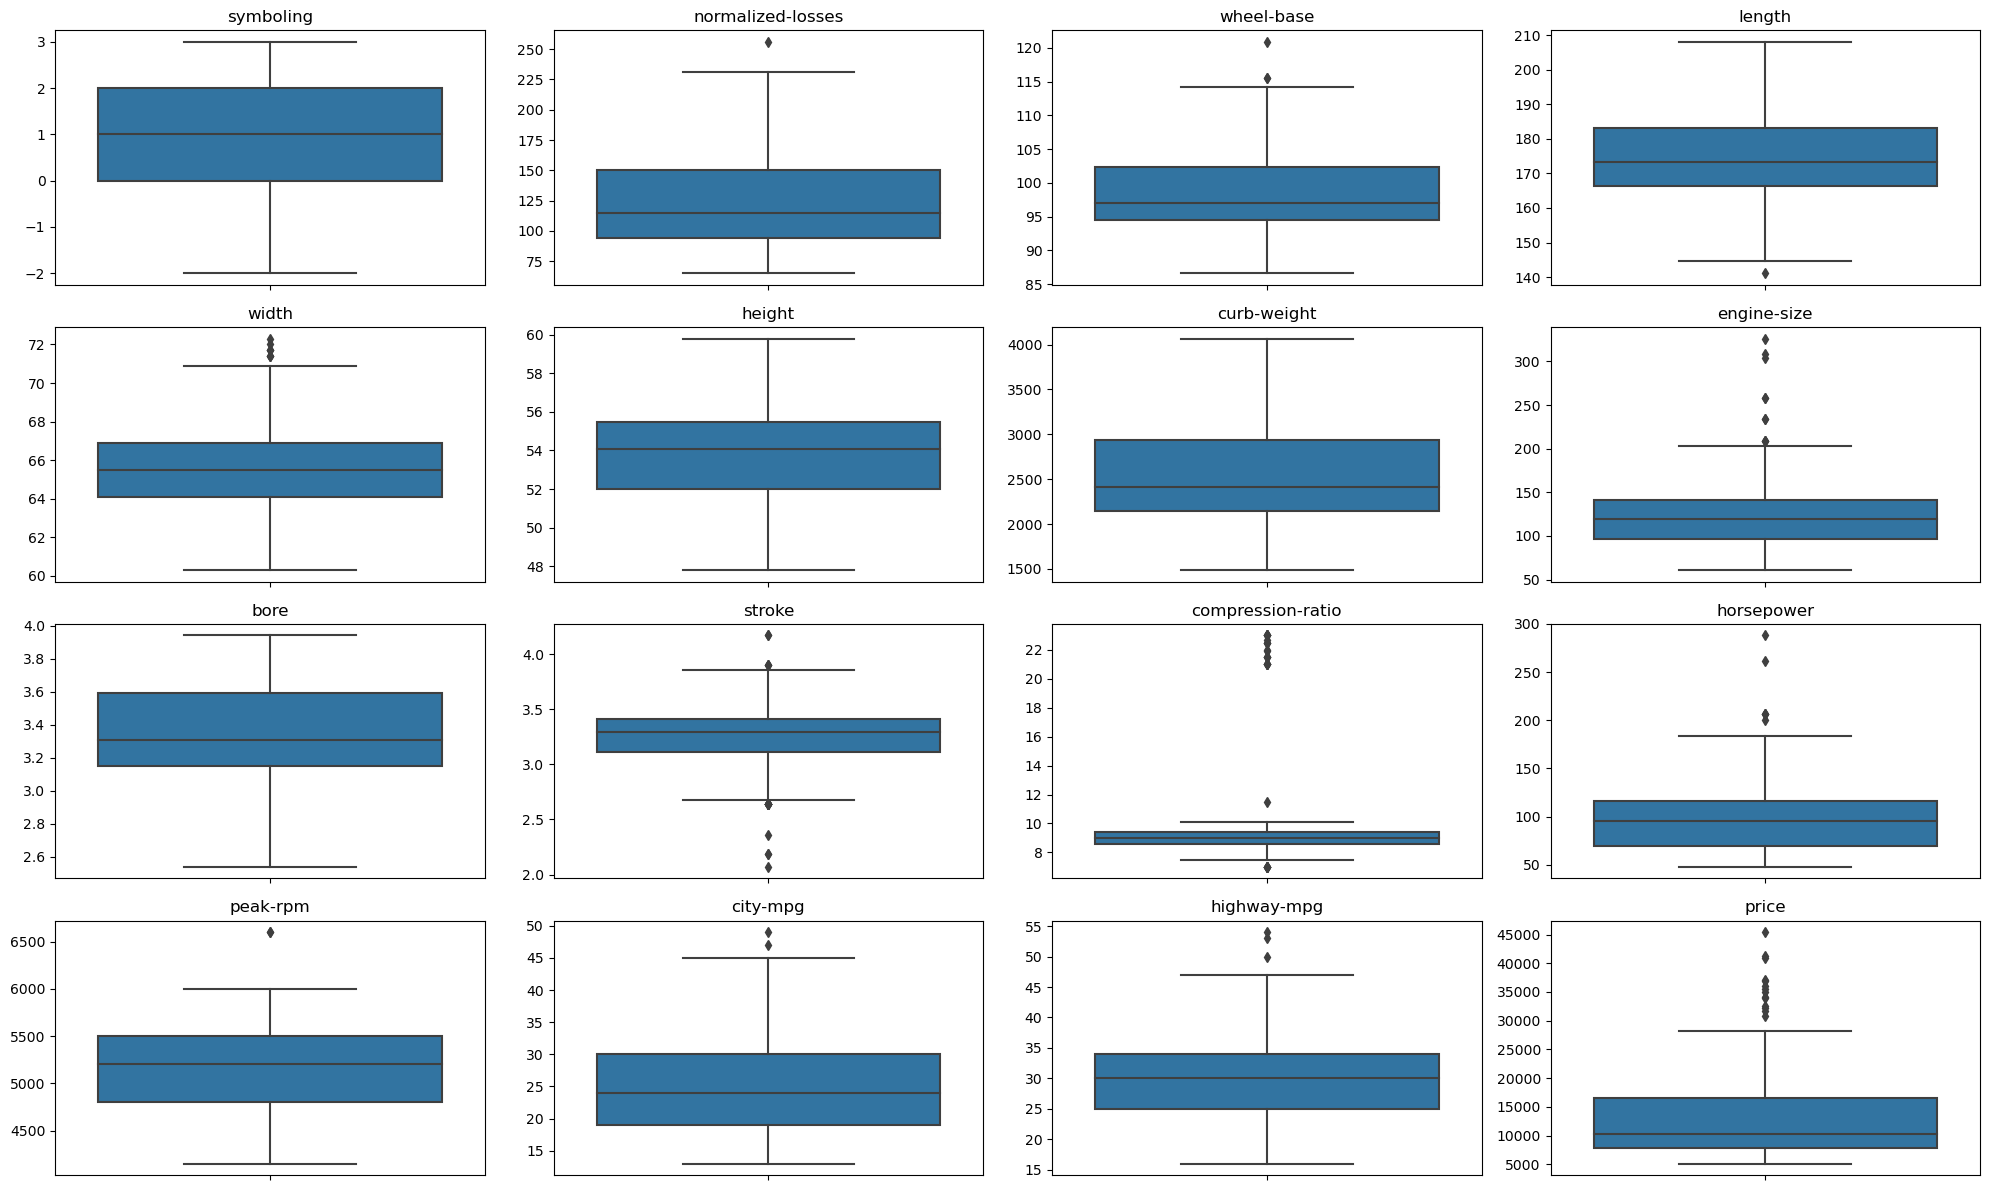

Amount of outliers by using IQR method:
 symboling             0
normalized-losses     1
wheel-base            3
length                1
width                 8
height                0
curb-weight           0
engine-size          10
bore                  0
stroke               20
compression-ratio    28
horsepower            6
peak-rpm              2
city-mpg              2
highway-mpg           3
price                14
dtype: int64


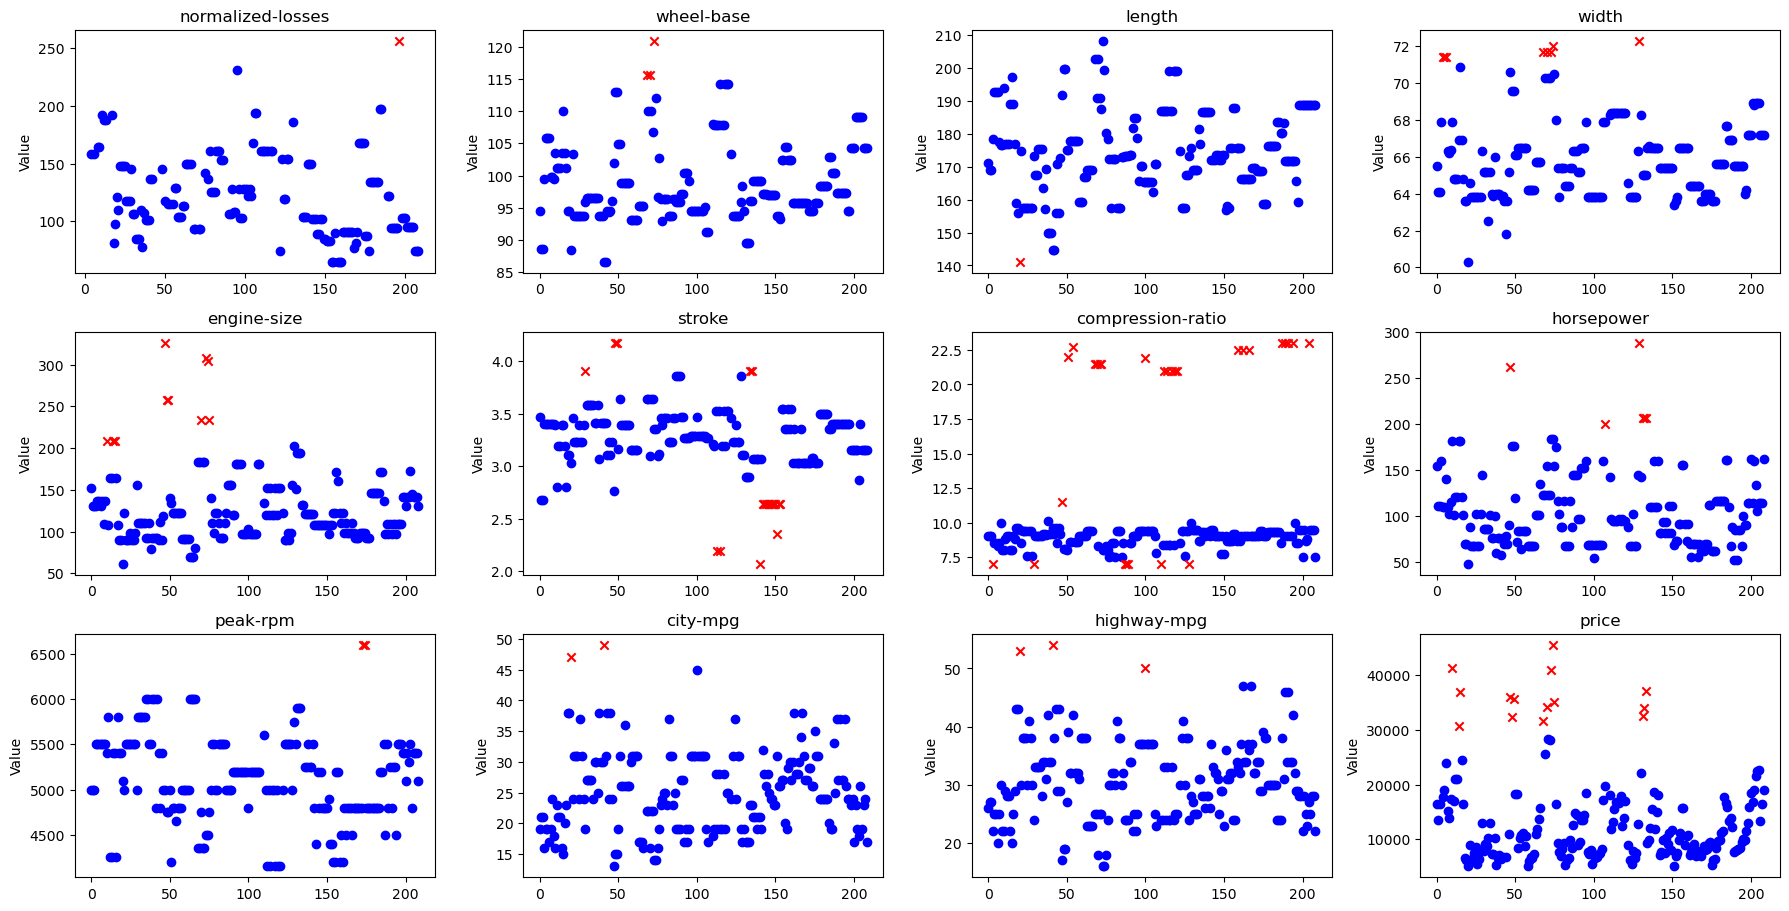

In [7]:
# 2) handling outlier
# identify potential outliers in numerical data
# 1) Identify numerical column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 2) Using visualization method to detect outliers:
print(f'visualization method to detect outliers')
plt.figure(figsize=(20,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
    
plt.tight_layout()
plt.show()
# 3) Using IQR method to detect outliers
# a) calculate IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Detect outliers as values beyond the lower and upper bounds (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# b) detect outliers
outlier_mask = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
num_outliers = outlier_mask.sum()
print(f'Amount of outliers by using IQR method:\n {num_outliers}')

        


#Identify the attributes with outliers and plot the outlier/non-outliers using scatterplots
plt.figure(figsize=(18,12))
attributes_with_outliers = [col for col, num in num_outliers.items() if num>0]
for i, col in enumerate(attributes_with_outliers, 1):
    plt.subplot(4,4,i)
    plt.scatter(df.index[~outlier_mask[col]],df[col][~outlier_mask[col]], marker='o', label='Non-outlier', color ='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outlier', color='red')
    plt.title(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()



In [8]:
# remove outliers
log10_cols = ['compression-ratio', 'engine-size']
df[log10_cols] = np.where(outlier_mask[log10_cols], np.log10(df[log10_cols]), df[log10_cols])

In [9]:
# 3) handling missing value
# a) check for missing values in each columns
num_missing = df.isnull().sum()

# b) identify columns with missing values:
col_with_mis = num_missing[num_missing > 0]
col_with_mis




normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [10]:
# missing value in numerical columns
numeric_cols_miss = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
# missing value in categoricall columns
cate_cols_miss = ['num-of-doors'] 

In [11]:
#Handling missing values
#a) numerical columns
for col in numeric_cols_miss:
    med_value = df[col].median()
    df[col].fillna(med_value, inplace=True)
#b) categorical columns
for col in cate_cols_miss:
    df[col].fillna('Unknown', inplace = True)
#c) check if there is any missing value left
miss_after_handle = df.isnull().sum().sum()
miss_after_handle


0

In [12]:
# 3) Explore clean dataset
# 3.1.Generate Summary Statistics
print("\n----Summary Statistics:\n",df.describe())
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}\n\n')



----Summary Statistics:
         symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         120.600000   98.756585  174.049268   65.907805   
std      1.245307          31.805105    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  205.000000  205.000000   
mean    53.724878  2555.565854   114.590277    3.329366    3.256098   
std      2.443522   520.680204    38.114746    0.270858    0.313634   
min  


------ Distribution of Numerical Data:


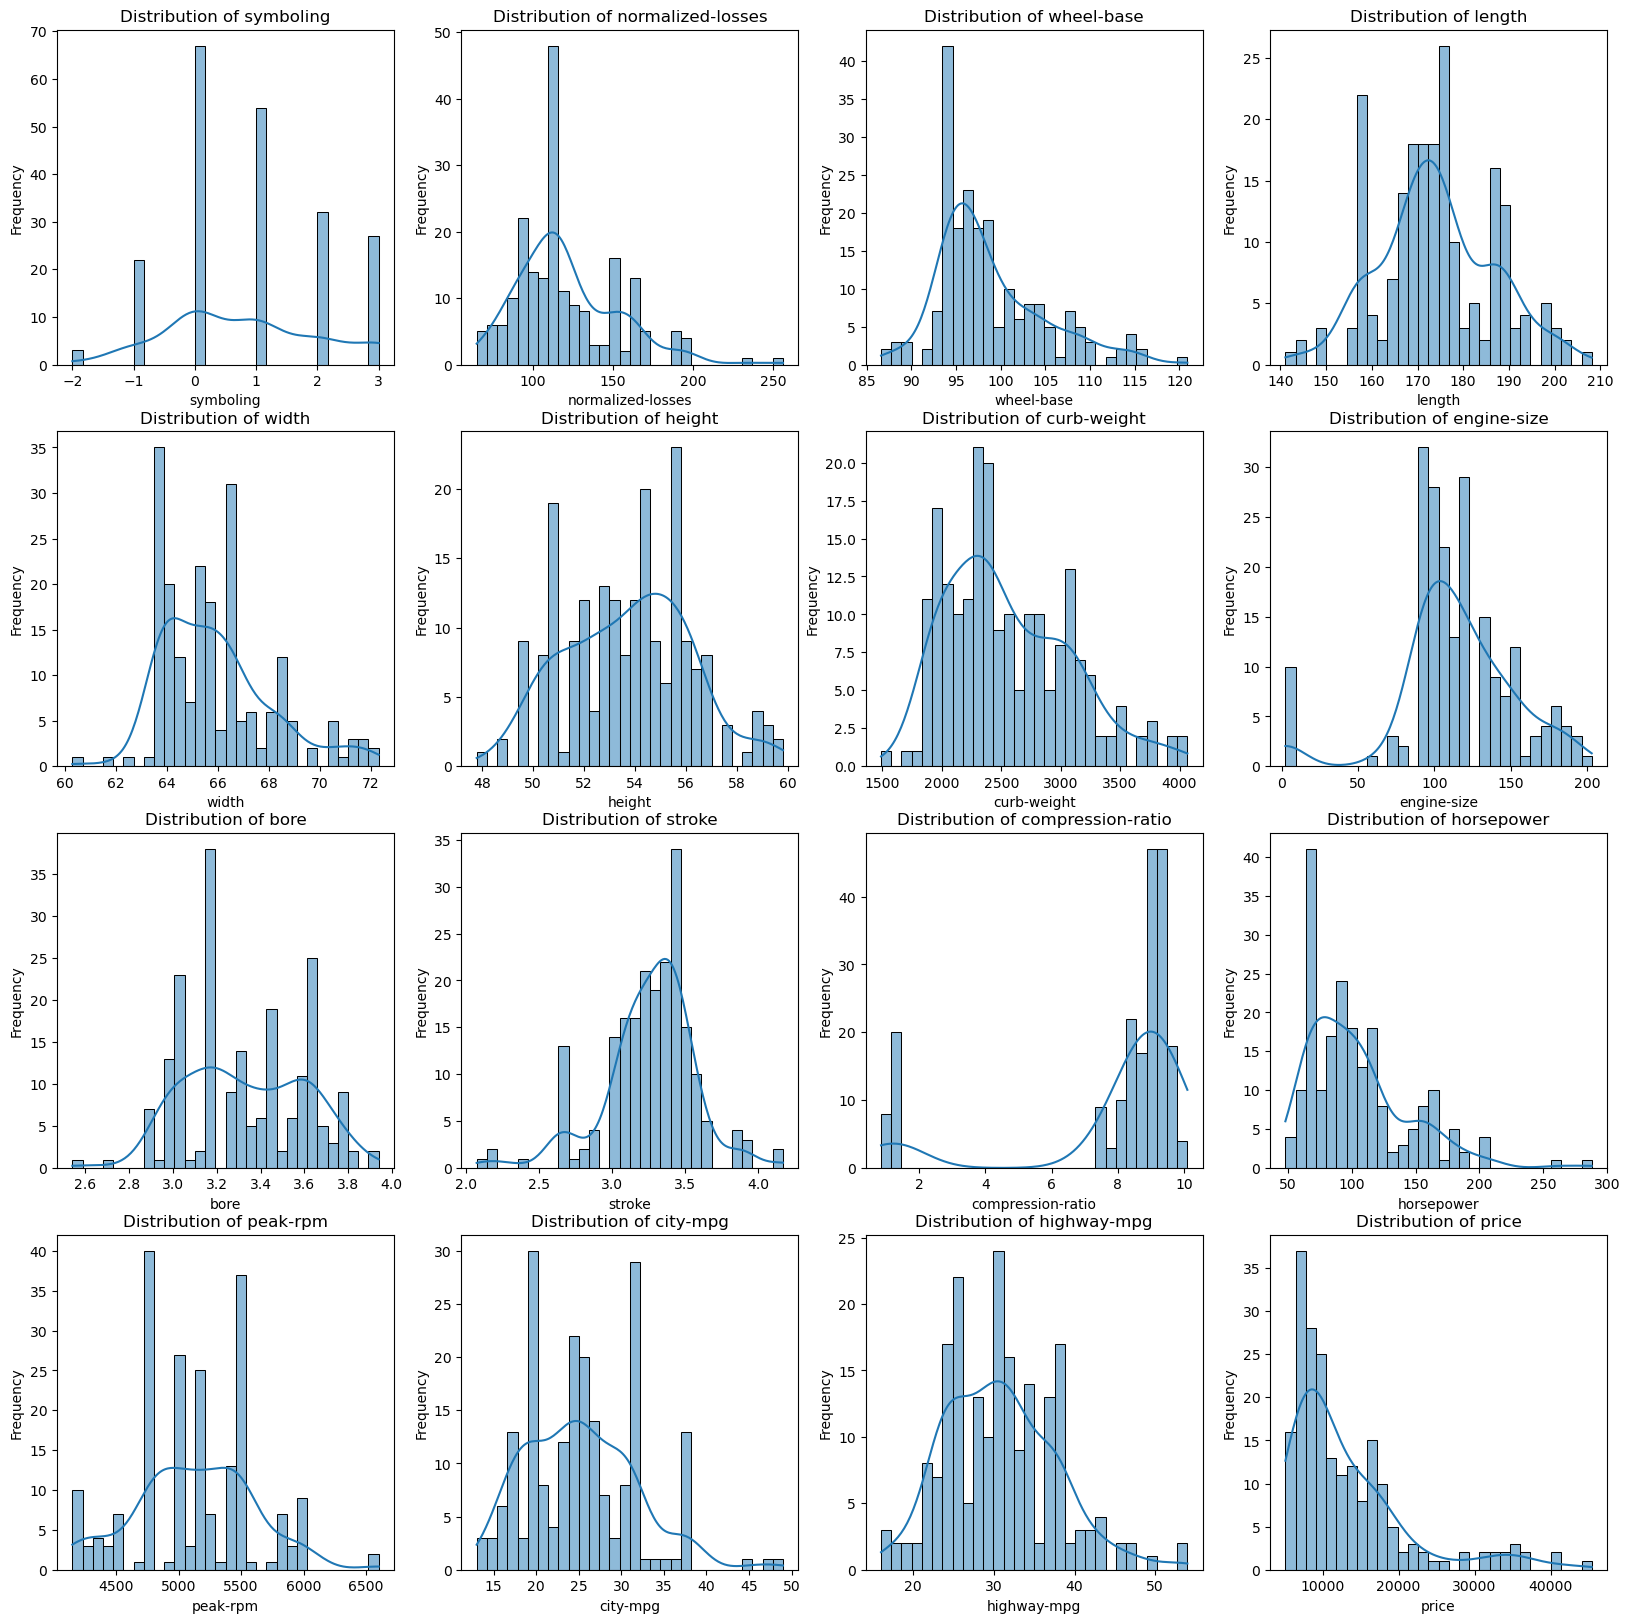

In [13]:
# 3.2. Distribution of Numerical Columns
print("\n------ Distribution of Numerical Data:")

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')



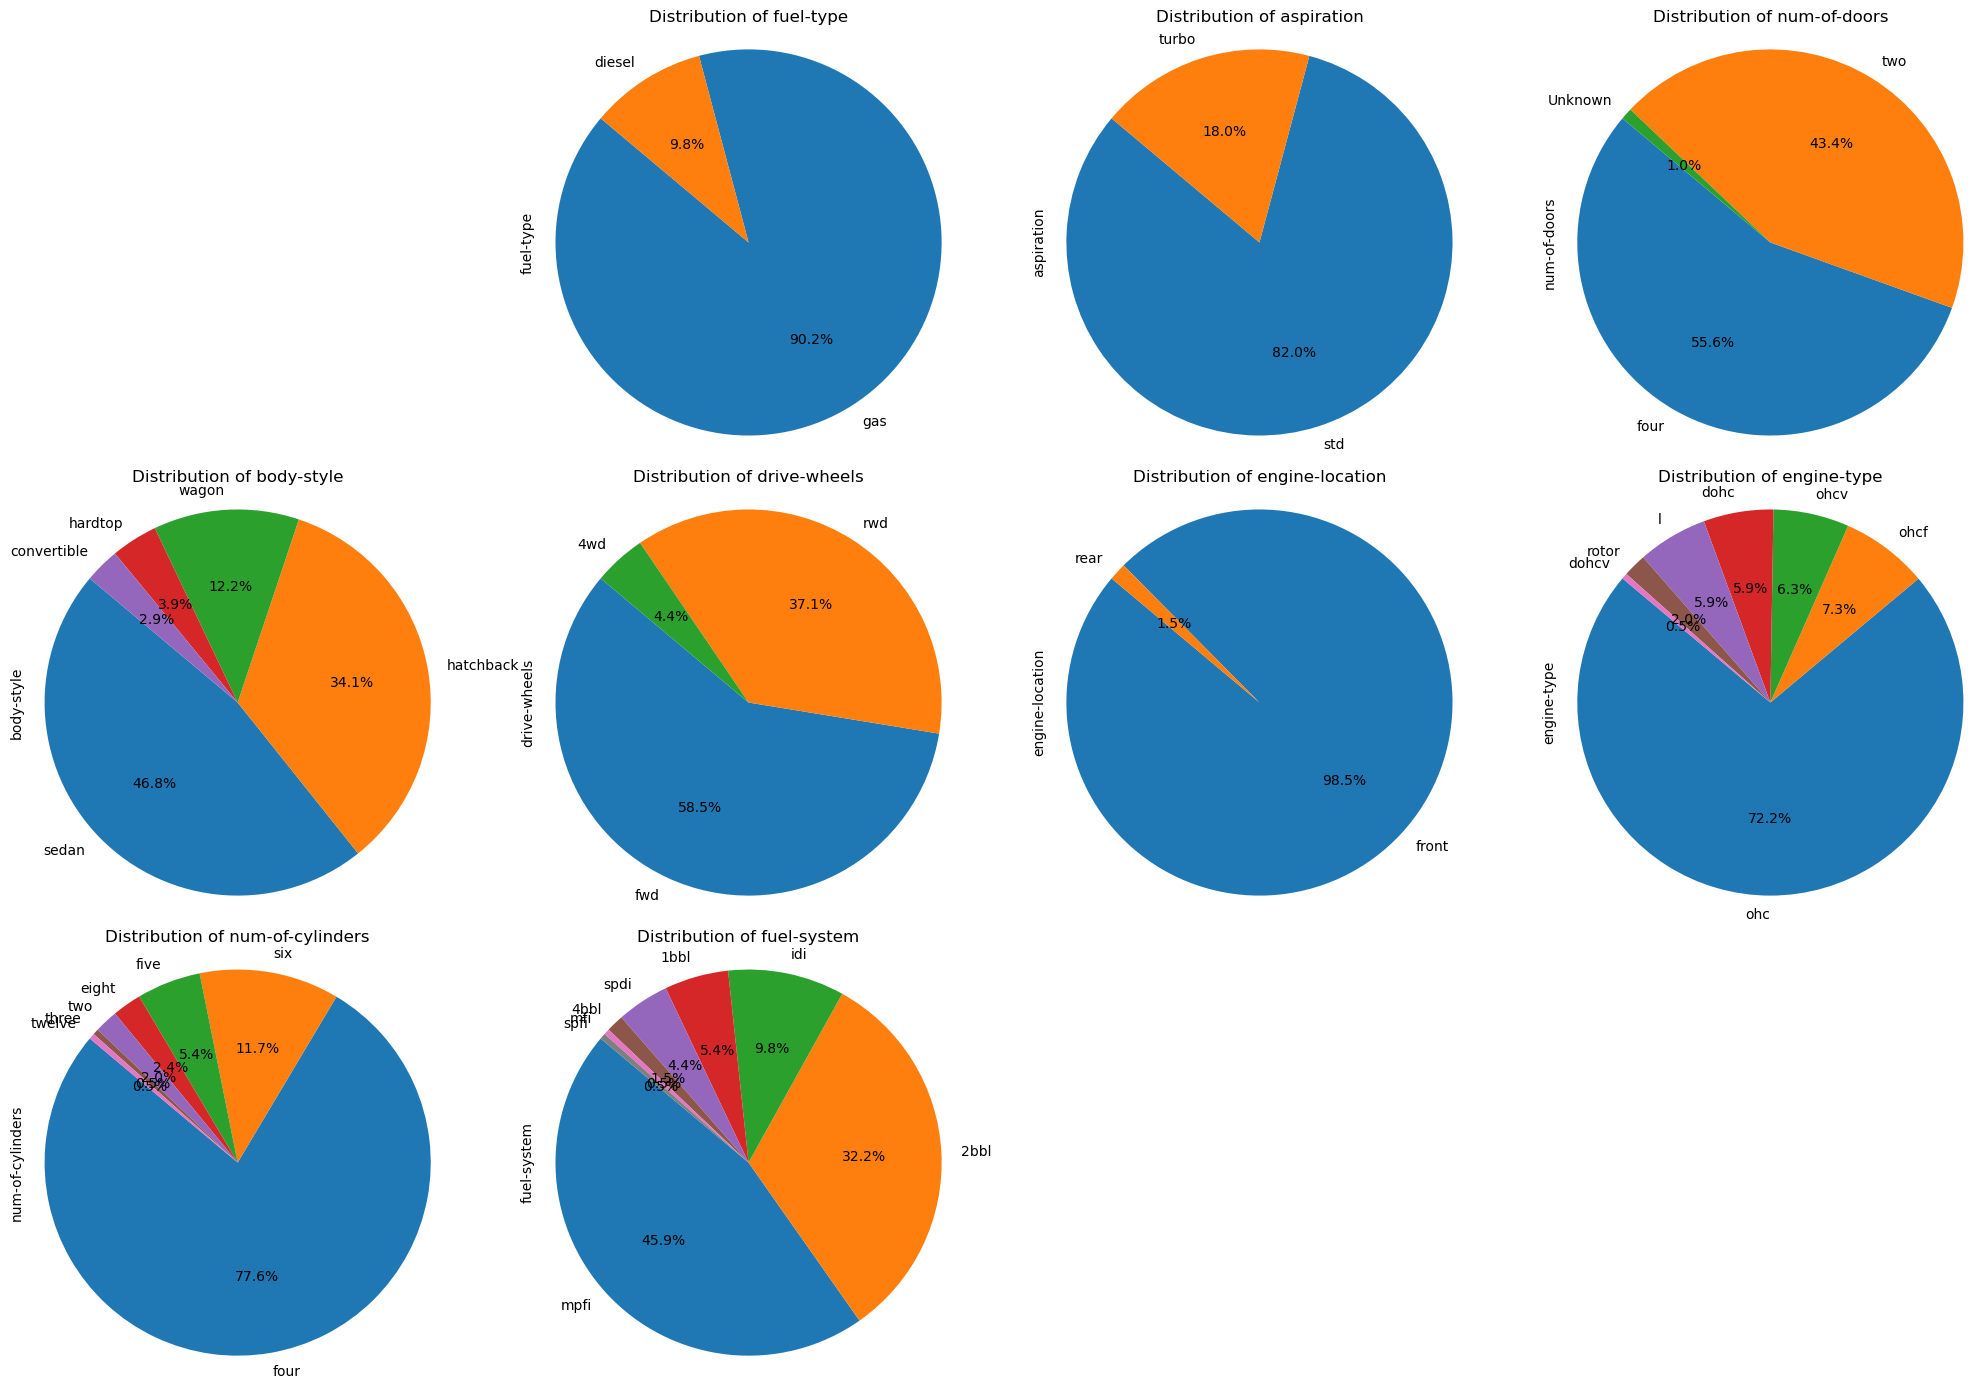

C:\Users\Admin1\AppData\Local\Temp\ipykernel_29964\3684043876.py:39: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_categories = main_categories.append(pd.Series({'Other categories': other_categories_percentage}))


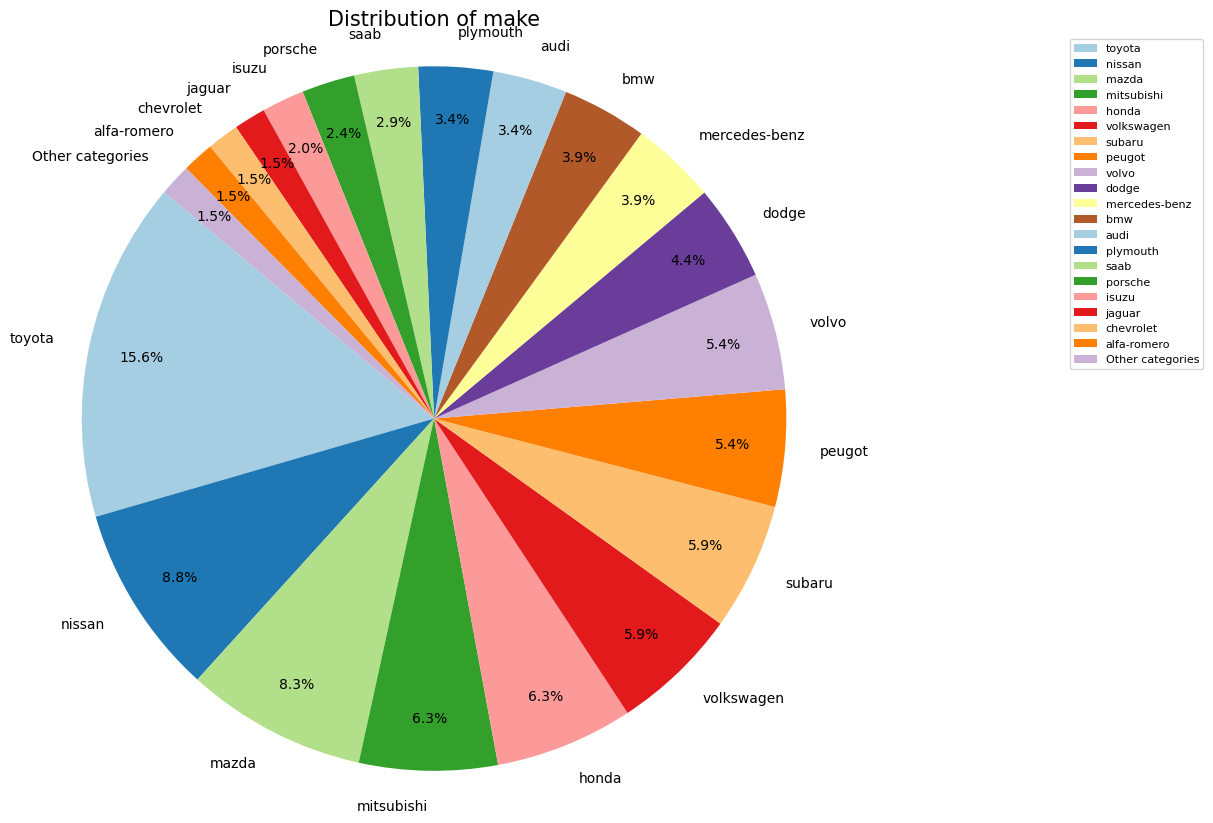

In [14]:
# 3.3.Distribution of categorical columns
# identify categorical colums
cate_cols = df.select_dtypes(include=['object']).columns

#pie chart for categorical columns
plt.figure(figsize=(20, 14))
for i, col in enumerate(cate_cols, 1):
    if col == 'make':
        continue
    plt.subplot(3, 4, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

#Step "make" Distribution Pie Chart
## Define the threshold for grouping categories as 'Other'

threshold = 1.0

# Calculate the total count of entries in the 'make' column using len() function
total_count = len(df['make'])

# Calculate the percentages of each category
category_percentages = (df['make'].value_counts()) / total_count * 100

# Separate categories based on the threshold
main_categories = category_percentages[category_percentages >= threshold]
other_categories = category_percentages[category_percentages < threshold]

# Identify the individual categories within the 'Other categories' group
other_individual_categories = other_categories.index

# Calculate the percentage of 'Other categories'
other_categories_percentage = other_categories.sum()

# Create a new series combining the main categories and 'Other categories'
combined_categories = main_categories.append(pd.Series({'Other categories': other_categories_percentage}))

# Define a mask for filtering other categories
other_categories_mask = df['make'].isin(other_individual_categories)

# Calculate the count of occurrences for each vendor name within 'Other categories'
other_make_counts = df.loc[other_categories_mask, 'make'].value_counts()

# Plot the combined pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_categories, labels=combined_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, pctdistance=0.85)
plt.title('Distribution of make')
plt.axis('equal')

# Decrease font size of labels
plt.gca().set_title('Distribution of make', fontsize=15)
plt.gca().legend(combined_categories.index, loc="best", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
plt.gca().tick_params(axis='both', which='both', labelsize=8)
plt.show()


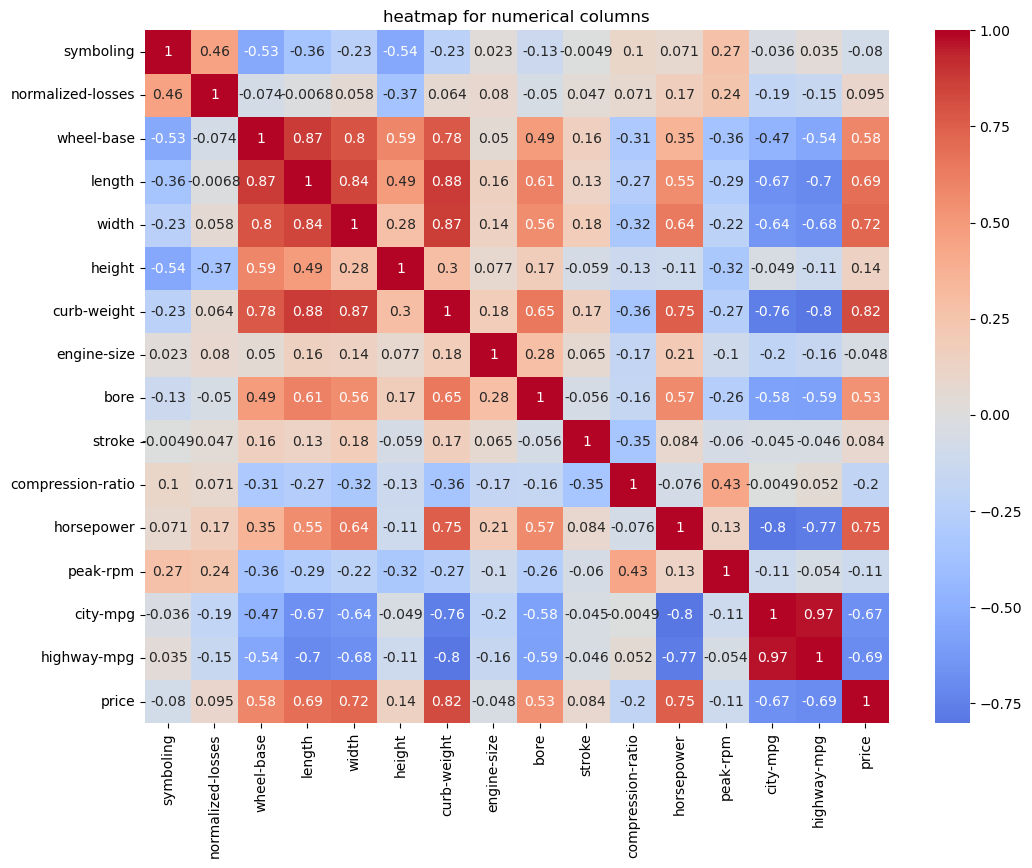

In [15]:
# part 4) Multivariate Analysis
#4a) correlation analysis
# calculate the correlation matrix
corr_mat = df[numeric_cols].corr()
# create the heatmap of the correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title(f'heatmap for numerical columns')
plt.show()

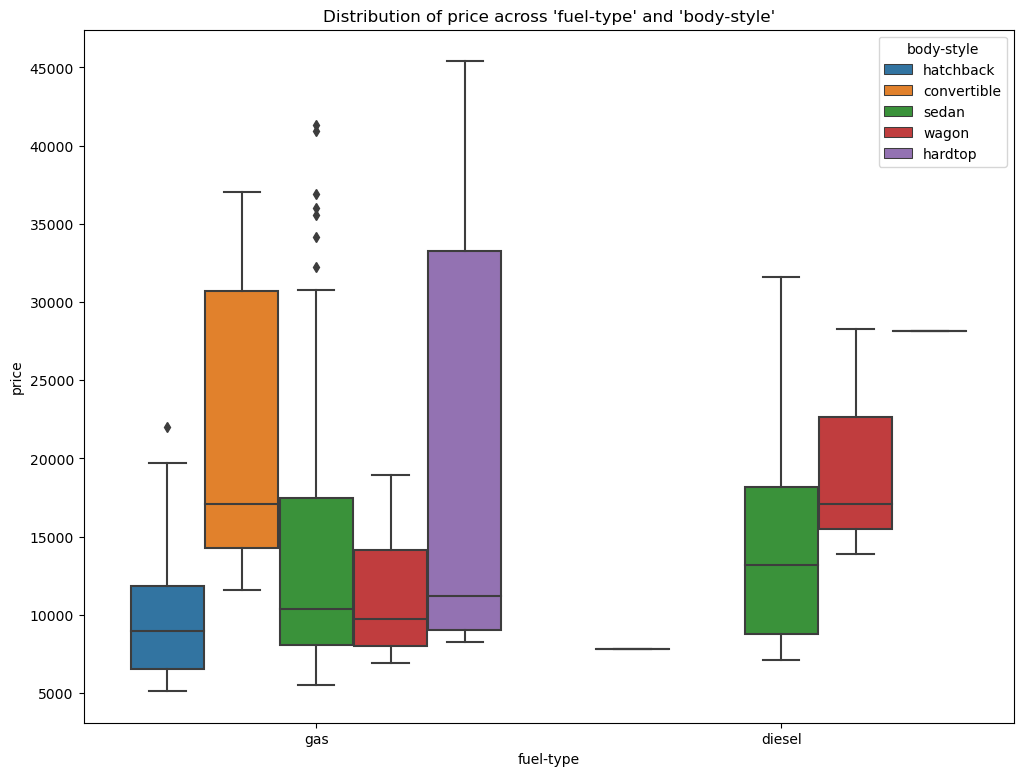

In [16]:
#4b)Perform multivariate analysis of data
#Boxplot to show Distribution of fuel-type, body-styles and price

plt.figure(figsize=(12,9))
sns.boxplot(data = df, x='fuel-type', y='price', hue='body-style')
plt.title("Distribution of price across 'fuel-type' and 'body-style'")
plt.xlabel('fuel-type')
plt.ylabel('price')
plt.legend(title='body-style')
plt.show()


Mean and Median Price by drive-wheels:

                      mean   median
drive-wheels                       
4wd           10247.000000   9233.0
fwd            9262.283333   8222.0
rwd           19633.105263  16872.5


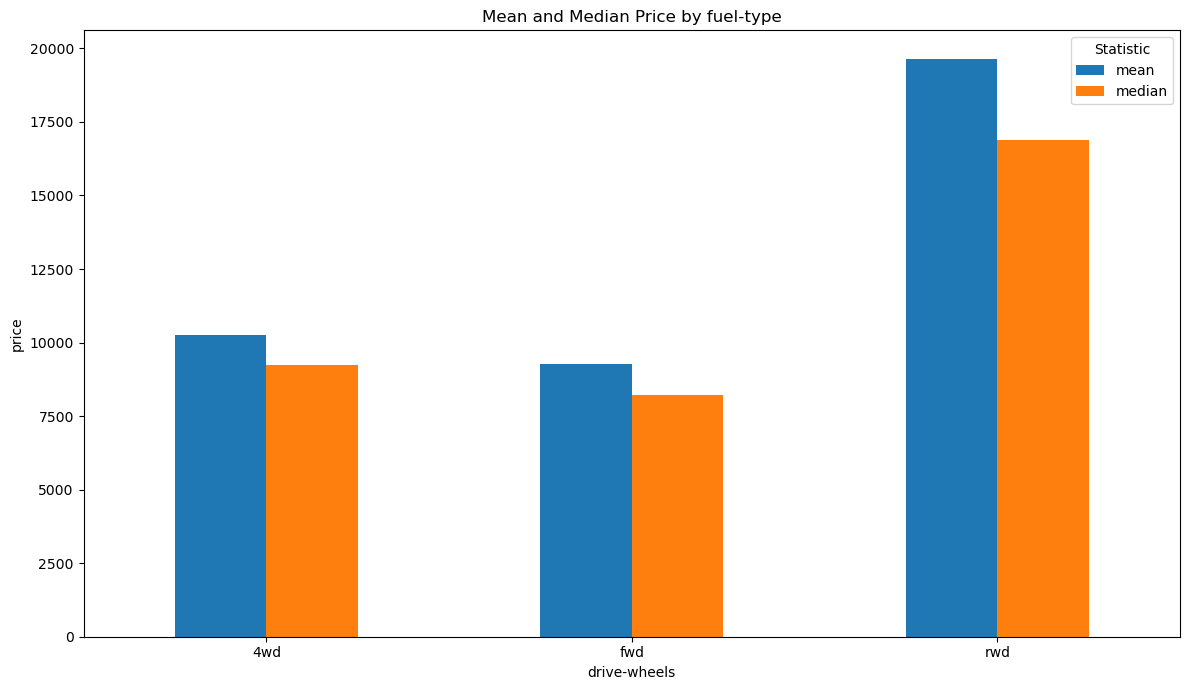

In [17]:
#4c) Data Aggregation 
# Aggregate Data by using groupby
aggregated_data = df.groupby('drive-wheels')['price'].agg(['mean', 'median'])
print(f'Mean and Median Price by drive-wheels:\n\n{aggregated_data}')
# Display the aggregated data
aggregated_data.plot(kind='bar', figsize=(12,7))
plt.title('Mean and Median Price by fuel-type')
plt.xlabel('drive-wheels')
plt.ylabel('price')
plt.legend(title='Statistic')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

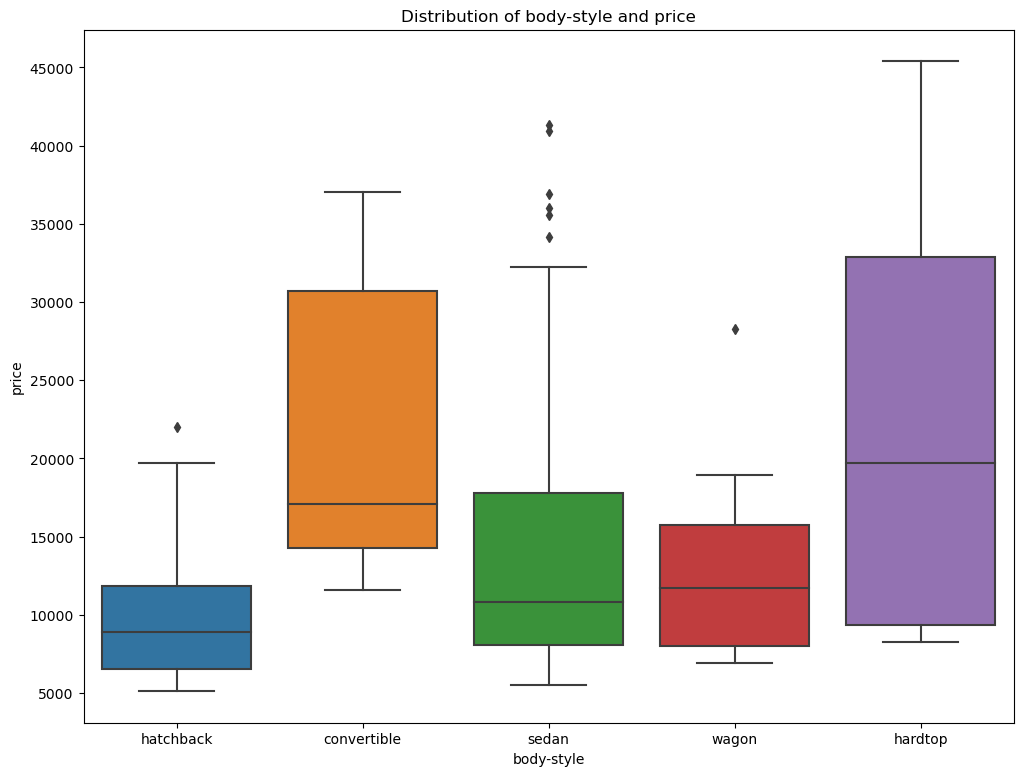

In [18]:
#4d) visualize 'body style'and 'price'
plt.figure(figsize=(12,9))
sns.boxplot(data = df, x='body-style', y='price')
plt.title("Distribution of body-style and price")
plt.xlabel('body-style')
plt.ylabel('price')
plt.xticks(rotation=0)
plt.show()